In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as so

### THEORY

Assumption: N data pairs {Y_i,t_i} fitted with model function g(a,t_i) with an unknown M-component parameter vector a. <br>
For each t_i, the data Y_i are measured with errors e_i with average of 0 and variances of sigma^2. <br>
a_0 is the best set of parameters a whose component minimize the quadratic deviation chi^2 [EQUATION 1.28]. <br>
chi^2(a_0) is known if g(a_0,t_i) is a suitable model and errors e_i = Y_i-g(a_0,t_i) are uncorrelated (Gaussian distribution) <br>
P(chi^2_0 ) [EQUATION 1.29, Incomplete Gamma Function] is verified by repeating the exp. <br>
chi^2(a_0) has N-M independent variables where M degrees of freedom are fixed. <br>
For large N-M, central limit theorem applies: chi^2 is distributed according to a gaussian with mean N-M and variance 2(N-M)

P(chi^2_0 ) = .99: Model is correct if chi^2 < ch^2_0 in 99% of all experiments. chi^2 >= chi^2_0 for 1% <br>
chi^2_0 must not be too small since our data have statistical errors. <br>
P(chi^2_0) is the prob for an exp to yield as smaller value than chi^2_0 <br>
Confidence interval is the accepted interval of P(chi^2_0)

chi^2_0: chi^2 with best set of parameters a_0 <br>
P(chi^2_0) is the chi^2 distribution

Satisfied Quality of fit: chi^2(a) has a minimum for a_0 and chi^2(a_0) falls within the confidence interval <br>
Repeated exp obtain diff errors e_i and diff parameter vectors a_0 <br>
Aim: estimate errors of a_0 <br>
Measure: contours in M-dimensional a-space with constant values of chi^2(a) <br>
For small deviations (a-a_0): countours are ellisoids with M principal axes. <br>
Length = measure of change one can allow for a_0 along these axes before fit is no longer acceptable. <br>

Artificial Y_i = g(a_0,t_i) + e_i where variance of e_i = sigma^2 (Gaussian distrobution) <br>
Simulation: search for new minimum a_1, a_2,... <br>
Error bars for fit parameters a_0: width distribution of a_k <br>

For small deviations (a-a_0): truncate the expansion of chi^2(a) about a_0 after the quadratic term <br>
delta = chi^2(a) - chi^2(a_0) is distributed acc to P with M degrees of freedom rather than N-M <br>
P(delta) determines the region of allowed a <br>

In [4]:
def f(t,a,om,phi,b):
    return a*np.sin(om*t+phi)*np.exp(-b*t)
t = np.linspace(0,3*np.pi,11)
t_ = np.linspace(0,3*np.pi,100)
data = f(t,1,1,0,0.1)+0.4*np.random.random()-0.2 #[-0.2,0.2) #(b-a)*rand+a
data_ = f(t_,1,1,0,0.1)
popt,pcov = so.curve_fit(f,t,data, p0 = [1,1,0,0.1])
print(popt)

[1.098209   0.98149097 0.06411387 0.10713363]


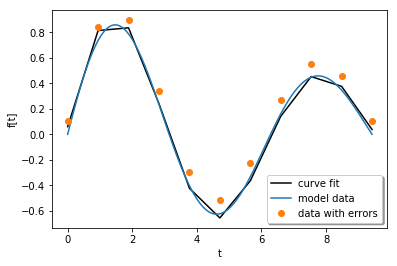

In [31]:
plt.plot(t, f(t,*popt), 'k', label = 'curve fit')
plt.plot(t_,data_,label = 'model data')
plt.plot(t,data,'o', label = 'noisy data')
plt.legend(loc='lower right', shadow=True, fontsize='medium')
plt.xlabel('t')
plt.ylabel('f[t]')
plt.show()

In [9]:
x = np.linspace(0,20,100)

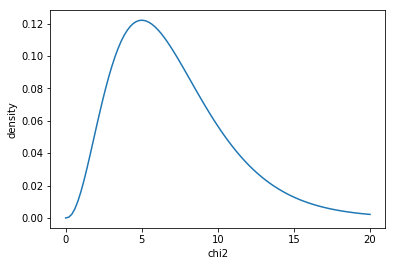

In [10]:
plt.plot(x,ss.chi2(7).pdf(x)) 
#N = 11 data points, M = 4 parameters/degrees of freedom, N-M = 7 independent variables for chi^2
#PDF = probability distribution function
plt.xlabel('chi2')
plt.ylabel('density')
plt.xticks(np.arange(0,25,5))
plt.show()

#chi^2 = measures how well the observed distribution of data fits with the 
#distribution that is expected if the variables are independent.

In [11]:
# density distribution for chi^2
# ppf: quantile {limit[0.05],limit[0.95]} > {2.2,14.1} chi squared
#5% chi_0=>14.1 and 5%: chi_0<= 2.2

C:\Users\Mary\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\Mary\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'level'
  s)


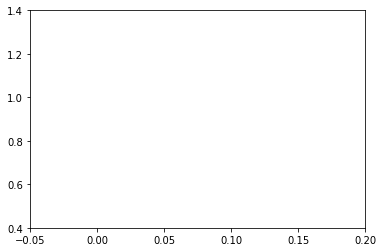

In [12]:
#def chi2(a,om,phi,b):
    #t = np.linspace(0,3*np.pi,11)
    #dat = []
    #for i in t:
        #data = a*np.sin(om*i+phi)*np.exp(-b*i)
        #data_ = a*np.sin(om*i+phi)*np.exp(-b*i)+0.4*np.random.random()-0.2
        #dat.append(2/150*(data_-data)**2)
    #return sum(dat)

def chi2(y,t,sigma):
    return x += (y-f(t,a,om,phi,b)*)/

a = np.linspace(0.4,1.4,11)
b = np.linspace(-0.05,0.2,11)
X,Y = np.meshgrid(a,b)
om = np.linspace(0.9,1.04,11)
phi = np.linspace(0,0.14,11)
Z = chi2(X,om,phi,Y)
plt.contour(Y,X,Z, level =[0.68,0.90])

Fig 1.10. Contours of constant chi^2 for P(Delta) = 0.68 and P(delta) = 0.90

om angular frequency


(a,b) slice shows that variations of amplitude can be compensated for by a change in time constant of damping (1/b) <br>
without reducing the fit quality <br>
Specify the cut along the optimum value of b for the projection onto a-axis <br>
It is not possible to determine the upper limit of the time constant (1/b) since the contour of the outer confidence region <br>
passes through b = 0 (b>1/inf)

(om,b) (x,y) <br>
True valuesom=1 b=0.1 lie close to the edge of the inner confidence region <br>
Confidence interval should not be narrow <br>
Compensation does not happen 

Fig 1.11 <br>
2 extrema from contour (a,b): (1.3,0.15) and (0.5,0) <br>
Both still represents data well <br>
Small no. of data does not permit better fit

Fig 1.12 <br>
Take optimum parameter a_0 > Generate new, artificial data that are fitted > a_k <br>
even more than 90% of data falls within outer contour <br>
Calculate chi^2 of a_k

PDF:density distribution, integrand of P

CDF: integral, P_7(chi^2_0) itself

Quantile: PPF: inverts P_7(chi^2_0), chi_0^2